# Analyzing KNN and SVM on IRIS and digits`

## SVM & KNN on IRIS

### Using SVM on IRIS against a training dataset and test set
Import Iris and split it into features and labels. We will be using only the 'petal length' and 'petal width' features for this analysis assigment

In [38]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
iris = datasets.load_iris()

# We'll use the petal length and width only for this analysis
X = iris.data[:, [2, 3]]
y = iris.target

# Place the iris data into a pandas dataframe
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

# View the first 5 rows of the data
print(iris_df.head())

# Print the unique labels of the dataset
print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

The unique labels in this data are [0 1 2]


### Splitting Data into training set and test set

In [6]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 105 samples in the training set and 45 samples in the test set
()


In [7]:
#Scaling data using SKlearn
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.291459
1           0.930661          0.737219
2           1.042022          1.637313
3           0.652258          0.351465
4           1.097702          0.737219


#### When we plot the data, we see that one of the classes is linearly separable while the other two are not.

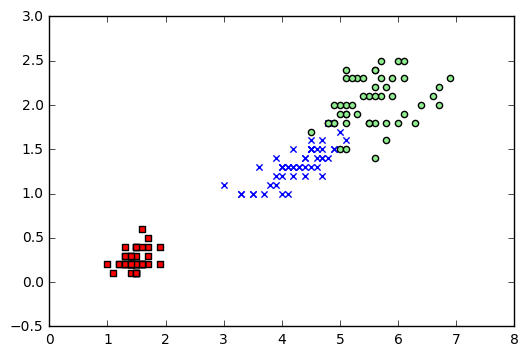

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

#### Using Linear SVC to predict the labels of our test data

In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


#### We can see that our classifier performed really well. 
Now, we will visualize how the model classified the samples in our test data.

In [17]:
import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

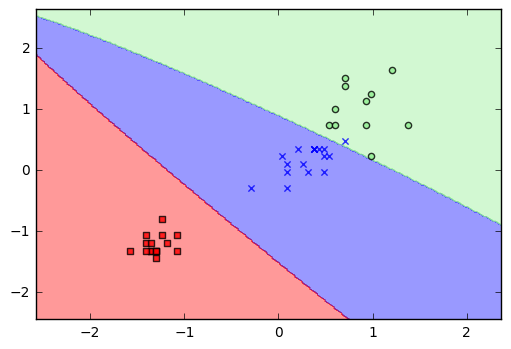

In [18]:
plot_decision_regions(X_test_std, y_test, svm)

### Using KNN on IRIS against a training dataset

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test_std, y_test)))

The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data


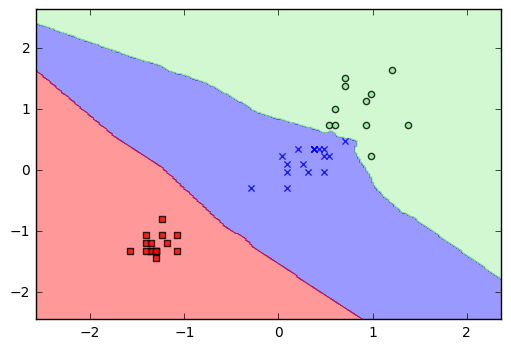

In [21]:
plot_decision_regions(X_test_std, y_test, knn)

### Result: We can see that in both classifiers, performance on test data is better on training data. With this simple implementation, the KNN algorithm seems to have better performance than that of the SVM algorithm.


## SVM & KNN on digits

### Using SVM on DIGIT dataset

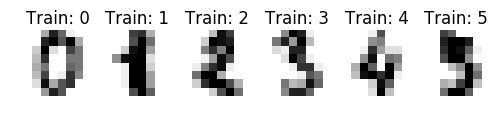

In [29]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# We will be loading the first 6 images from the dataset
images_and_labels = list(zip(digits.images, digits.target))
# we know that the image points to a digit represented by the target
for index, (image, label) in enumerate(images_and_labels[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Train: %i' % label)

After training on the 6 digits, we will now flatten the image and learn digits

Stats for prediction 
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899



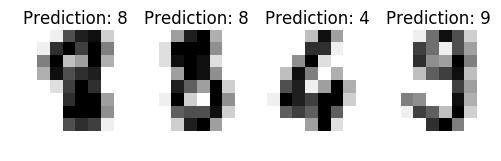

In [36]:
# We will be flattening the image to create a sampleXfeature matrix
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
clf = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
clf.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = clf.predict(data[n_samples / 2:])

print("Stats for prediction \n%s"
       % ( metrics.classification_report(expected, predicted)))

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

As we see, the precision of the training was 0.97 on an average which is pretty good.

### Using KNN on DIGITS

In [50]:
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)
data = digits.images.reshape((n_samples, -1))

X_train = X_digits[:.9 * n_samples]
y_train = y_digits[:.9 * n_samples]
X_test = X_digits[.9 * n_samples:]
y_test = y_digits[.9 * n_samples:]

#create the knn classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train).score(X_test, y_test)

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = knn.predict(data[n_samples / 2:])

print("Stats for prediction \n%s"
       % ( metrics.classification_report(expected, predicted)))

Stats for prediction 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        88
          1       0.98      1.00      0.99        91
          2       0.99      1.00      0.99        86
          3       0.97      0.96      0.96        91
          4       1.00      0.98      0.99        92
          5       0.97      0.99      0.98        91
          6       0.99      1.00      0.99        91
          7       0.96      1.00      0.98        89
          8       0.99      0.95      0.97        88
          9       1.00      0.96      0.98        92

avg / total       0.98      0.98      0.98       899



/Users/asrivastava/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/asrivastava/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/asrivastava/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/asrivastava/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


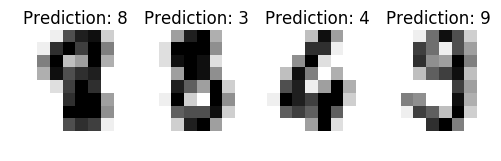

In [51]:
images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

### Result: We can see that on the digits data set, KNN performs marginally better on prediciton that SVM algorithm